# Fourier filtering in 2D


## Exercise:

Given the following 2D functions:

$f_1(x,y) = \sin(\alpha\,x)+ \sin(4\alpha\,x)$

(a) Make a 3D plot of the surfaces they represent.


(b) Make 2D projections of these surfaces onto the XY plane.


(c) Calculate their 2D Fourier transforms, including the frequency axes.


(d) Calculate their characteristic (spatial) frequencies and compare with the analytical inputs.


(e) Apply a low-pass filter to remove the highest frequency component.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def function_2Dn(x, y, alpha):
    """
    Function to create the surface
    """
    return np.sin(alpha*x) + np.sin(4*alpha*x)

In [3]:
# Define the step size/spacing
d_spacing = 0.001

# Vectors for x and y
x = np.arange(0, 1, d_spacing)
y = np.arange(0, 1, d_spacing)

# Define the input the frequency
alpha = 10*np.pi

# Create the meshgrid
X, Y = np.meshgrid(x, y)

# Call the surface function
Z_fn = function_2Dn(X, Y, alpha)

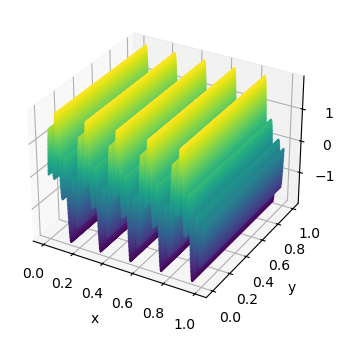

In [4]:
# Now we do some plotting:
fig = plt.figure(figsize= (5,4))

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z_fn, 100, cmap='viridis') # Creates 'n=10' contours at different Z to make the surface

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

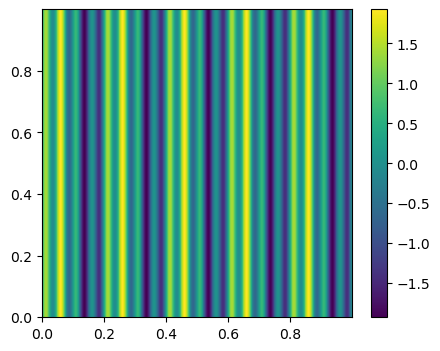

In [5]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(X, Y, Z_fn, shading='auto', cmap = "viridis")

plt.colorbar(Z1)

plt.show()

# Fourier transform:

In [6]:
# Fourier transform:
fourier_Zn = np.fft.fft2(Z_fn)

# Copy the Fourier signal
filtered_Zn = fourier_Zn.copy()

# Inverse Fourier transform
ifourier_Zn = np.fft.ifft2(fourier_Zn)

# Shift the signal so that the low frequencies are at the centre\
fourier_Z2n = np.fft.fftshift(fourier_Zn)

# Frequencies:
freqs_x = np.fft.fftfreq(Z_fn.shape[0], d = d_spacing)
freqs_y = np.fft.fftfreq(Z_fn.shape[1], d = d_spacing)

# Frequency mesh:
freqs_X, freqs_Y = np.meshgrid(sorted(freqs_x), sorted(freqs_y))

# Norm of Fourier transform:
norm_fourier_Zn2 = np.abs(fourier_Z2n)

### Fourier plot:

/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_27877/442634740.py:3: RuntimeWarning: divide by zero encountered in log10
  Z1 = plt.pcolor(freqs_X, freqs_Y, np.log10(norm_fourier_Zn2), cmap = "Reds", vmin = 3, vmax = 5, shading='auto')
/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_27877/442634740.py:5: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(Z1)


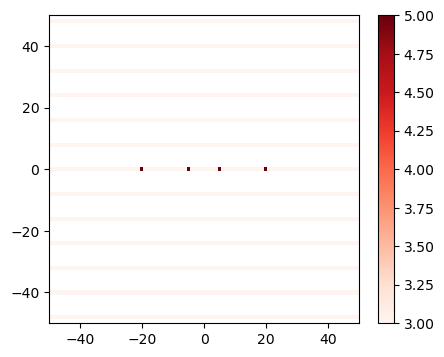

In [7]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(freqs_X, freqs_Y, np.log10(norm_fourier_Zn2), cmap = "Reds", vmin = 3, vmax = 5, shading='auto')

plt.colorbar(Z1)

plt.xlim(-50, 50)
plt.ylim(-50, 50)

plt.show()

### Filtered 2D Fourier signal:

Low-pass Filter:

We assign zeros to the FFT amplitudes where the absolute frequencies are larger than the low cut-off frequency.

In [8]:
# This was the copy filtered_Zn

# Cutoff freq:
l_cutoff = 15

# Shift the filtered signal so that the low frequencies are at the centre\
filtered_Z2n = np.fft.fftshift(filtered_Zn)

# Create filtered signal:
filtered_Z2n[np.abs(freqs_X) > l_cutoff] = 0

# Norm of the filtered signal

norm_filtered_Z2n = np.abs(filtered_Z2n)

/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_27877/981890105.py:3: RuntimeWarning: divide by zero encountered in log10
  Z1 = plt.pcolor(freqs_X, freqs_Y, np.log10(norm_filtered_Z2n), cmap = "Reds", vmin = 3, vmax = 5, shading='auto')
/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_27877/981890105.py:5: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(Z1)


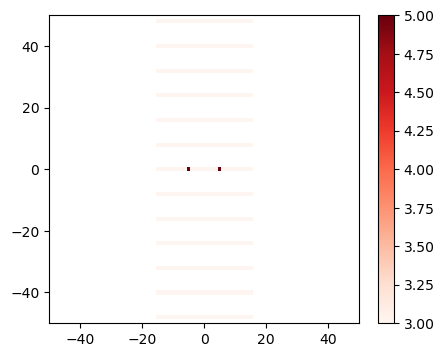

In [9]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(freqs_X, freqs_Y, np.log10(norm_filtered_Z2n), cmap = "Reds", vmin = 3, vmax = 5, shading='auto')

plt.colorbar(Z1)

plt.xlim(-50, 50)
plt.ylim(-50, 50)

plt.show()

## Inverse Fourier transform of the filtered signal

In [10]:
# Unshift the signal
inv_filter_Zn = np.fft.ifftshift(filtered_Z2n)

#Inverse FFT the unshifted signal
inv_filter_Zn = np.fft.ifft2(inv_filter_Zn)

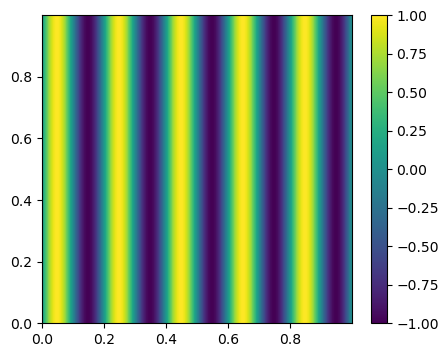

In [11]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(X, Y, inv_filter_Zn.real, shading='auto', cmap = "viridis")

plt.colorbar(Z1)

plt.show()

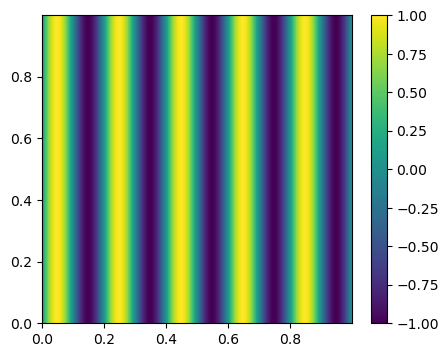

In [12]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(X, Y, np.sin(alpha*X), shading='auto', cmap = "viridis")

plt.colorbar(Z1)

plt.show()

(f) Apply a high-pass filter to remove the lowest frequency component.

/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_27877/442634740.py:3: RuntimeWarning: divide by zero encountered in log10
  Z1 = plt.pcolor(freqs_X, freqs_Y, np.log10(norm_fourier_Zn2), cmap = "Reds", vmin = 3, vmax = 5, shading='auto')
/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_27877/442634740.py:5: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(Z1)


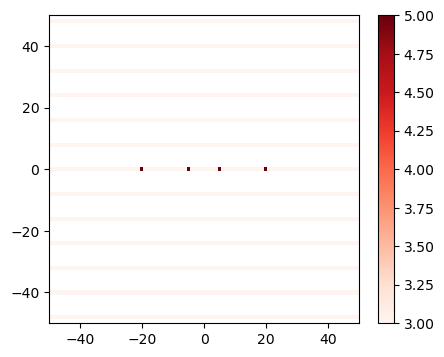

In [12]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(freqs_X, freqs_Y, np.log10(norm_fourier_Zn2), cmap = "Reds", vmin = 3, vmax = 5, shading='auto')

plt.colorbar(Z1)

plt.xlim(-50, 50)
plt.ylim(-50, 50)

plt.show()

In [13]:
# This was the copy filtered_Zn

# Cutoff freq:
l_cutoff = 15

# Shift the filtered signal so that the low frequencies are at the centre\
filtered_Z2n = np.fft.fftshift(filtered_Zn)

# Create filtered signal:
filtered_Z2n[np.abs(freqs_X) < l_cutoff] = 0

# Norm of the filtered signal

norm_filtered_Z2n = np.abs(filtered_Z2n)

/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_27877/981890105.py:3: RuntimeWarning: divide by zero encountered in log10
  Z1 = plt.pcolor(freqs_X, freqs_Y, np.log10(norm_filtered_Z2n), cmap = "Reds", vmin = 3, vmax = 5, shading='auto')
/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_27877/981890105.py:5: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(Z1)


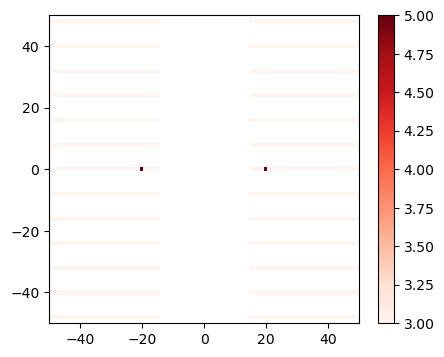

In [14]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(freqs_X, freqs_Y, np.log10(norm_filtered_Z2n), cmap = "Reds", vmin = 3, vmax = 5, shading='auto')

plt.colorbar(Z1)

plt.xlim(-50, 50)
plt.ylim(-50, 50)

plt.show()

In [15]:
# Unshift the signal
inv_filter_Zn = np.fft.ifftshift(filtered_Z2n)

#Inverse FFT the unshifted signal
inv_filter_Zn = np.fft.ifft2(inv_filter_Zn)

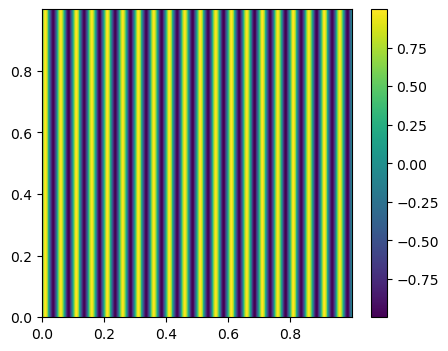

In [16]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(X, Y, inv_filter_Zn.real, shading='auto', cmap = "viridis")

plt.colorbar(Z1)

plt.show()

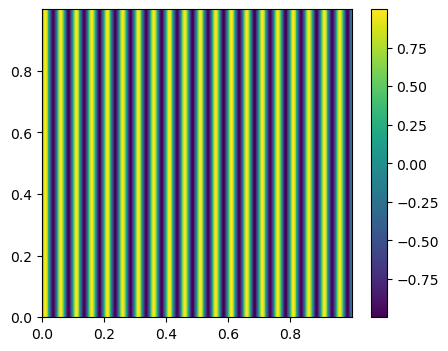

In [18]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(X, Y, np.sin(4*alpha*X), shading='auto', cmap = "viridis")

plt.colorbar(Z1)

plt.show()